In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics

# 讀取資料並丟棄 cnt 欄位

資料上，day.csv 為 hour.csv 丟棄 hr 欄位後重新加總之結果，hour.csv 擁有較豐富的資訊，故使用 hour.csv 資料集。

In [2]:
hour = pd.read_csv("hour.csv", index_col=0).drop(columns="cnt")
hour

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7


由於預測目標為一種計數型的資料，我們先把要預測的目標欄位畫出來看看。

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


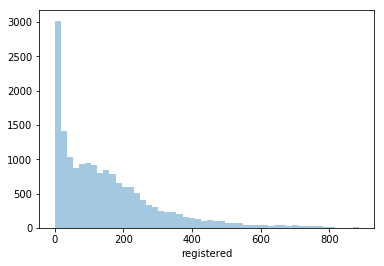

In [3]:
sns.distplot(hour["registered"], kde=False)

要預測的欄位呈現類似長尾分佈，希望以 Poisson regression 來嘗試，但這個模型在 sklearn 中沒有。另一種方式，也可以將預測目標數值取 log 後作為建模的目標，取 log 後會接近常態分佈，就可以用 linear regression，但要注意 0 的處理。0 無法直接取 log，可以以 $log(x+1)$ 的方式處理。

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


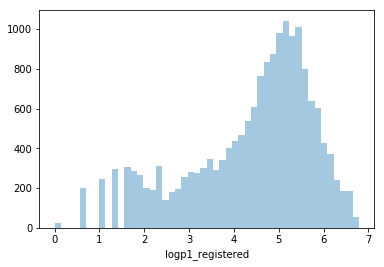

In [4]:
hour["logp1_registered"] = np.log1p(hour["registered"])
sns.distplot(hour["logp1_registered"], kde=False)

整體上來說，並非單峰的常態分佈，可能有其他因素夾雜，或是疊加兩種以上的分佈情況，我們可以從兩兩的關係圖中找一些端倪，我們篩選連續數值型資料來看。

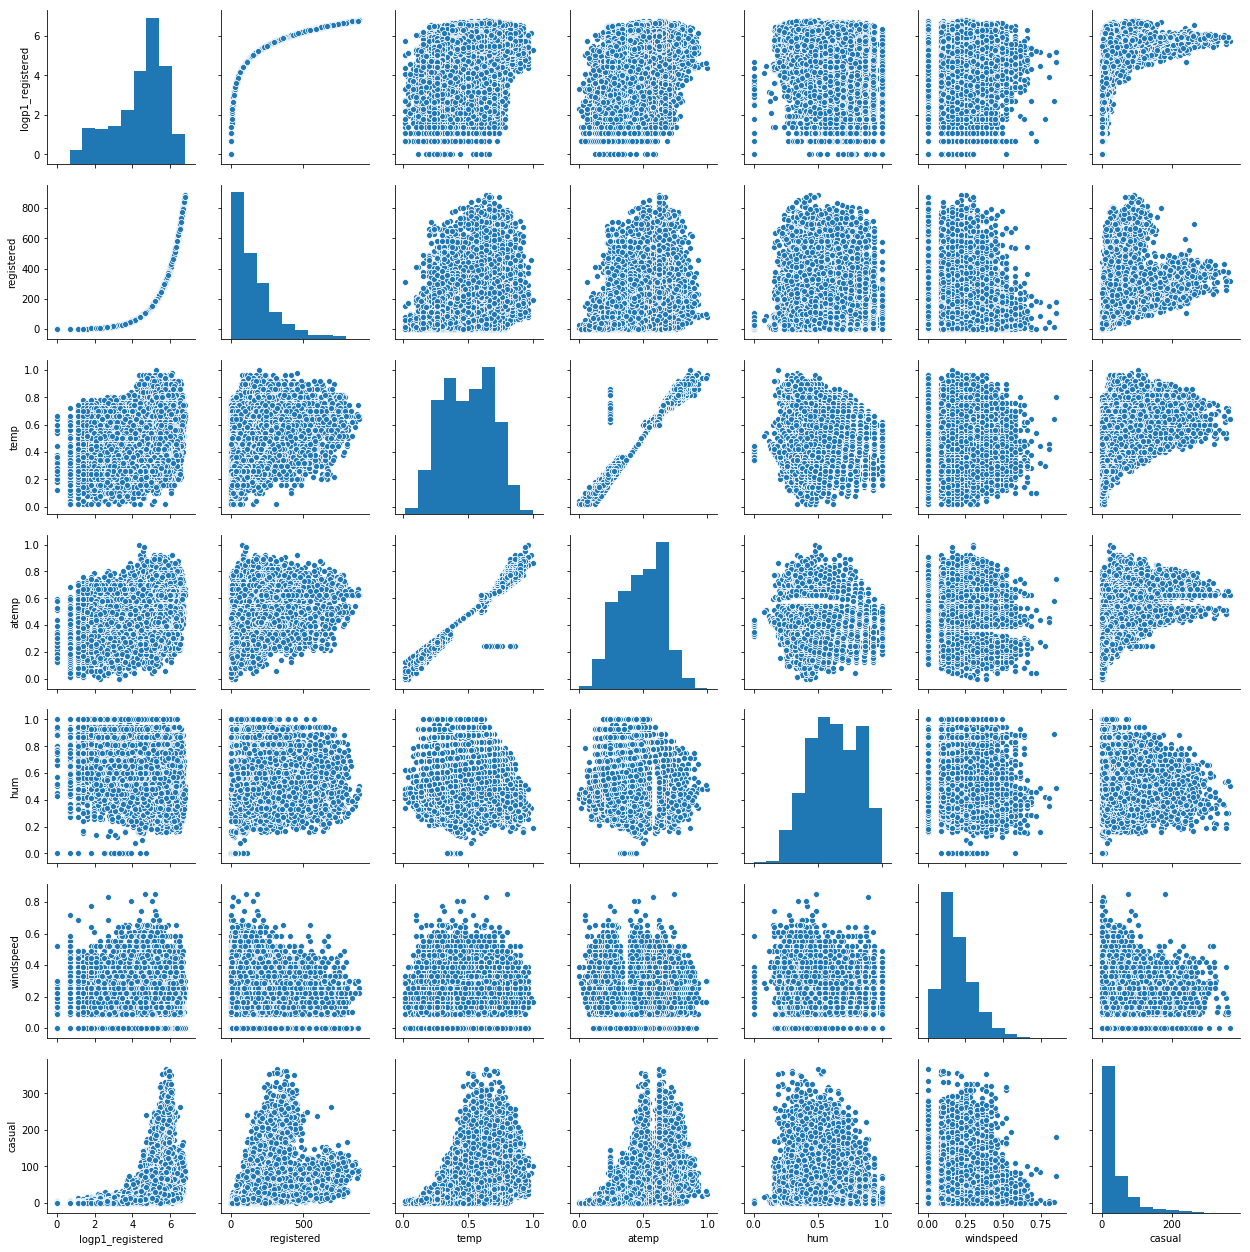

In [5]:
selected = ["logp1_registered", "registered", "temp", "atemp", "hum", "windspeed", "casual"]
sns.pairplot(hour, x_vars=selected, y_vars=selected)

發現 temp 及 atemp 為極為相關的資料欄位，可以從說明中得知 atemp 為體感溫度，所以我們只需要其一即可。從 casual 的分佈圖來看，是很漂亮的 Poisson 分佈，而 casual 與 registered 的關係圖來看，當中混雜著兩個不同斜率的線性趨勢，所以 casual 可以提供一些預測的資訊。發現大多這些連續型資料對我們要預測的目標都沒有幫助，他們都沒有一個明顯的模式存在，所以我們只留下 windspeed, casual 兩個連續型特徵。

In [6]:
hour = hour.drop(columns=["temp", "atemp", "hum"])

接下來我們來看看離散型資料的部份。

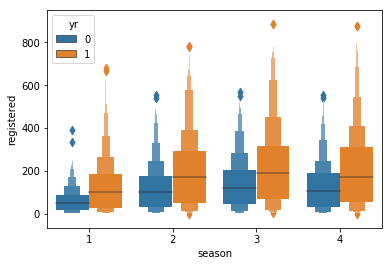

In [7]:
sns.boxenplot(x="season", y="registered", hue="yr", data=hour)

不同年份有影響，但可能不是造成兩線性模式的主因。

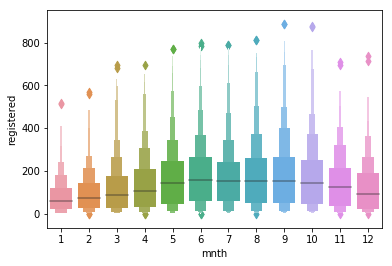

In [8]:
sns.boxenplot(x="mnth", y="registered", data=hour)

不同月份有造成連續漸變的影響，但可能不是造成兩線性模式的主因。

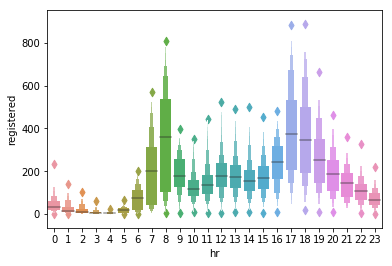

In [9]:
sns.boxenplot(x="hr", y="registered", data=hour)

一天不同時段確實有造成影響，與一般人的作息時間相符，但可能不是造成兩線性模式的主因。

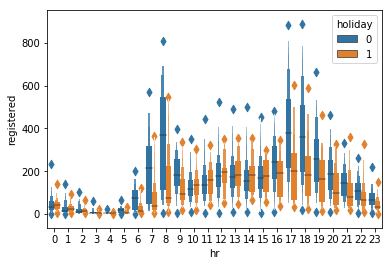

In [10]:
sns.boxenplot(x="hr", y="registered", hue="holiday", data=hour)

在一天當中，是否為 holiday 有較為明顯影響，可能為潛在造成兩線性模式的主因。

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


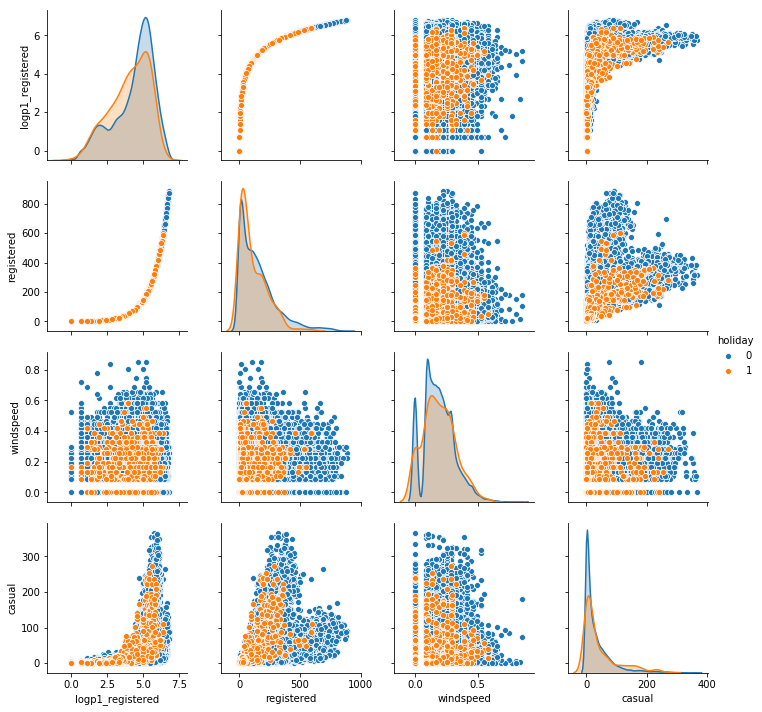

In [11]:
selected = ["logp1_registered", "registered", "windspeed", "casual"]
sns.pairplot(hour, hue="holiday", x_vars=selected, y_vars=selected)

經由進一步確認後，並不是主因。

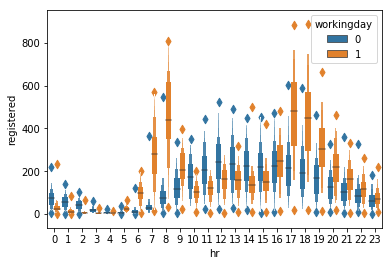

In [12]:
sns.boxenplot(x="hr", y="registered", hue="workingday", data=hour)

在一天當中，是否為 workingday 有顯著影響，極有可能為造成兩線性模式的主因。

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


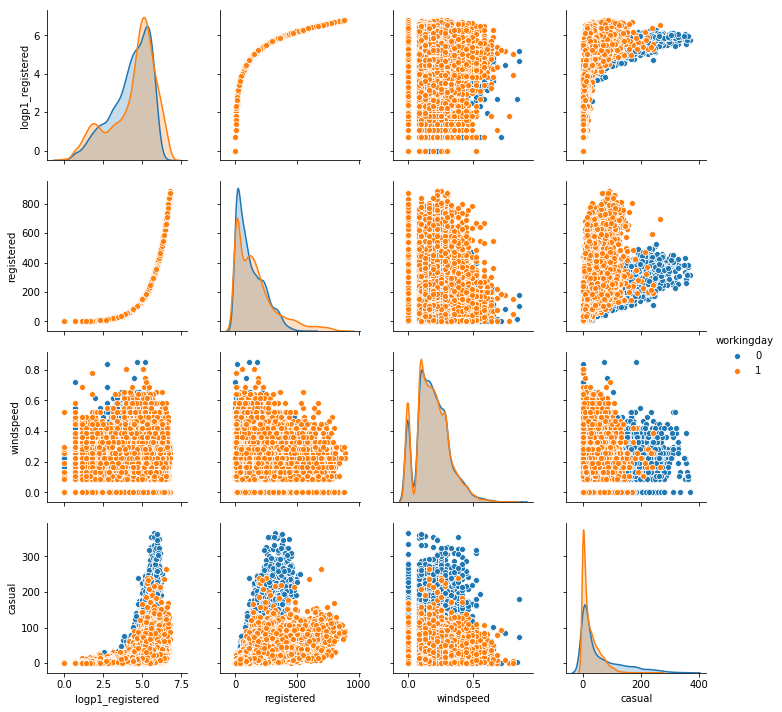

In [13]:
selected = ["logp1_registered", "registered", "windspeed", "casual"]
sns.pairplot(hour, hue="workingday", x_vars=selected, y_vars=selected)

進一步確認後，workingday 極有可能為造成兩線性模式的主因，並且確認 windspeed 為無效的特徵。

In [14]:
hour = hour.drop(columns=["windspeed"])

留下目前有助於預測的特徵，其中混合了離散型及連續型特徵，所以挑選允許這兩種特徵一起訓練的模型：random forest

In [15]:
hour

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,logp1_registered
instant,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,3,13,2.639057
2,2011-01-01,1,0,1,1,0,6,0,1,8,32,3.496508
3,2011-01-01,1,0,1,2,0,6,0,1,5,27,3.332205
4,2011-01-01,1,0,1,3,0,6,0,1,3,10,2.397895
5,2011-01-01,1,0,1,4,0,6,0,1,0,1,0.693147
6,2011-01-01,1,0,1,5,0,6,0,2,0,1,0.693147
7,2011-01-01,1,0,1,6,0,6,0,1,2,0,0.000000
8,2011-01-01,1,0,1,7,0,6,0,1,1,2,1.098612
9,2011-01-01,1,0,1,8,0,6,0,1,1,7,2.079442


In [16]:
from sklearn.ensemble import RandomForestRegressor

/usr/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


使用 random forest，長的樹愈多效果比較好，需要評估 OOB error，所以不必使用 CV。

In [17]:
model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=0)

In [18]:
model.fit(hour.iloc[:, 1:9].values, hour["logp1_registered"].values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [19]:
model.oob_score_

0.9354168278686021

在預測上有相當令人滿意的成績，但要注意預測結果需要進一步通過 $exp(x)-1$ 轉換才是真實的預測數值。